# Principal Component Analysis

This example shows how to perform a PCA using the python machine learning library scikit-learn

### Data
Scikit learn comes with several datasets on which to do the first step. This demo uses the 
[Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), which
contains data about 3 different types of the [iris flower](http://en.wikipedia.org/wiki/Iris_(plant) ):

* Setosa, 
* Versicolour and
* Virginica

It was [originally introduced](http://en.wikipedia.org/wiki/Iris_flower_data_set) by Sir Robert Fisher in 1936 as an example for discriminant analysis and contains the following features (measured in cm):

* Sepal Length, 
* Sepal Width, 
* Petal Length and 
* Petal Width.



In [1]:
#import the libraries we want to use.

import numpy as np
import pylab as pl
%matplotlib inline

from sklearn import neighbors
from sklearn import decomposition
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#load the example data from scikit-learn

from sklearn.datasets import load_iris
iris = load_iris()

#load the data
X = iris.data[:, :2]  
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

### Define a small helper function to visualize the data and the resulting areas which the algorithms associate with each data class

In [3]:
def plot_data(X_train, classifier, xlabel=None, ylabel=None):
 
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    #use a "mesh" to show how the algorithm determines the decision boundary
    h = .02  # step size in the mesh

    # Plot the decision boundary by assigning a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    #get the prediction from the classifier for the graphical illustration
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    # add the training points
    pl.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    pl.title("3-Class classification (k = %i, weights = '%s')"  % (n_neighbors, 'distance'))
    formatter = pl.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
    pl.colorbar(ticks=[0, 1, 2], format=formatter)

    pl.show()

### First look at the data
There are in total 4 feature variables, we now only look at the first 2 of them.

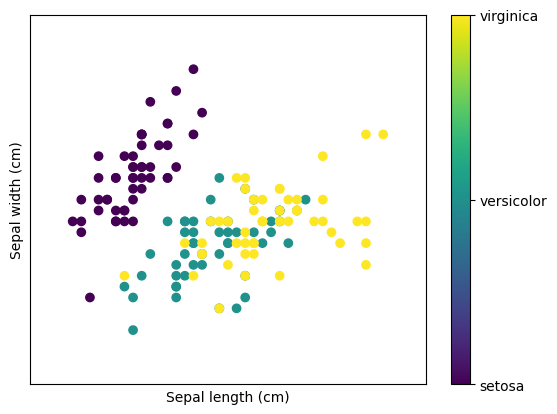

In [4]:
# Plot the training points
pl.scatter(X[:, 0], X[:, 1], c=y)
pl.xlabel('Sepal length (cm)')
pl.ylabel('Sepal width (cm)')

pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())

formatter = pl.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
pl.colorbar(ticks=[0, 1, 2], format=formatter)
pl.show()

In a first step we do a simple classification with these two variables to see how the algorithm performs:

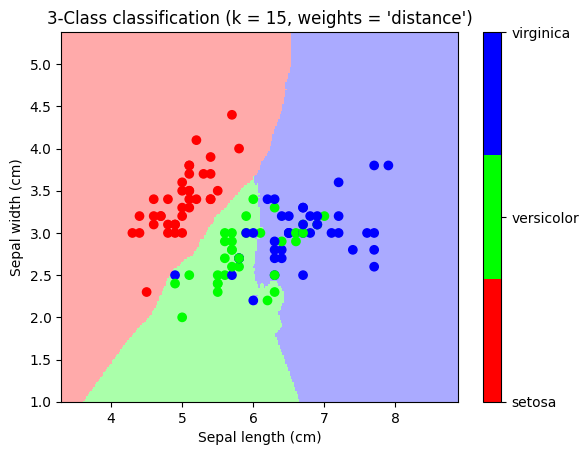

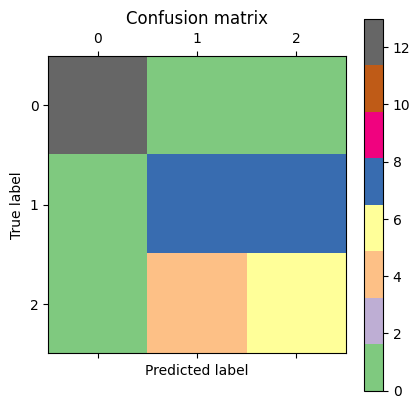

In [5]:
#create the classifier and fit the data
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

plot_data(X_train, clf, xlabel='Sepal length (cm)', ylabel='Sepal width (cm)')

#get the prediction from the classifier for the independent test dataset
#for further steps.
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Show confusion matrix 
pl.matshow(cm, cmap='Accent')
pl.title('Confusion matrix')
pl.colorbar()
pl.ylabel('True label')
pl.xlabel('Predicted label')
pl.savefig('confusion_matrix_1.png')
pl.show()


## Now do a Principal Component Analysis

Just taking the first two components as feature variables wasn't too successful.
As we can see there are many points not classfied correctly and class "1" and "2" are often confused, indicated by blue in the confusion matrix.

If we need to limit ourselves to two variables, we can use the PCA to create new variables from all available features and then use the two most relevant new variables.



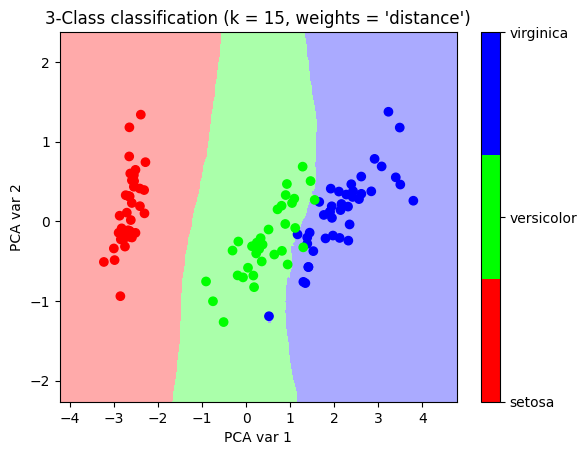

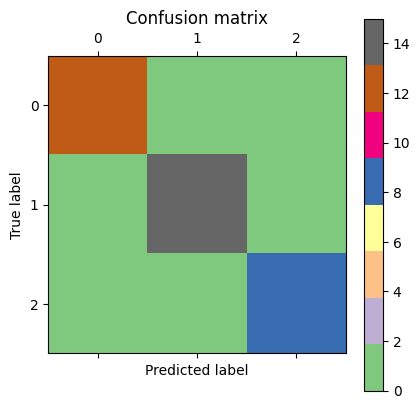

In [6]:
# ---> this is the important step <---------
#setup PCA, train it ("fit") and transform the variables ("transform")
pca = decomposition.PCA(n_components=3)
pca.fit(iris.data)
X_pca = pca.transform(iris.data)
# ---> this is the important step <---------

#now we take the first two feature variables after doing the PCA and pass it to the clustering algorithm
X = X_pca[:, :2]  
y = iris.target

# Split the data into a training set and a test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, random_state=0)

#use the same clustering approach as above
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train_pca, y_train_pca)

plot_data(X_train_pca, clf, xlabel='PCA var 1', ylabel='PCA var 2')

#get the prediction from the classifier for the independent test dataset
#for further steps.
y_pred_pca = clf.predict(X_test_pca)
#confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
# Show confusion matrix 
pl.matshow(cm, cmap='Accent')
pl.title('Confusion matrix')
pl.colorbar()
pl.ylabel('True label')
pl.xlabel('Predicted label')
pl.savefig('confusion_matrix_2.png')
pl.show()



As expected using the result of the PCA as the new features has improved the simple model significantly. The areas are much better defined and separated and the confusion matrix shows no further issues.